#ЛР №6

Основные понятия ООП. Инкапсуляция. Классы. Декораторы.

##Основная задача "Эксперимент"

Нужно написать класс "Эксперимент", который производит работу с данными.

Вы получили данные в виде словаря. Словарь имеет следующую структуру {'date': '2023-01-05', 'signal': 'path_to_ecg_signal', 'parameters':{}}

**Интерфейс**

Нужно написать класс, где должны поддерживаться следующие методы:

* _конструктор_ — принимает словарь и создает соответствующие поля (self.data, self.path_signal, self.parameters)
* `get_datе()` — возвращает дату записи сигнала.
* `get_signal_length()` — возвращает длину сигнала.
* `plot_signal()` — выводит график сигнала.
* `_signal_filtration(signal, filtration_parametres)` — производит фильтрацию сигнала.
* `_signal_find_peaks(signal, find_peaks_parametres)` — находит точки максимума сигнала и возвращает их в виде списка.
* `_calculate_RR_intervals()` — производит расчет длительности RR интервалов и возвращает длины RR интервалов в виде списка.
В этом методе вызываются методы _signal_filtration и _signal_find_peak.
* `get_RR_statistics()` — возвращает статистические характеристики RR интервалов на записи ECG - среднее, std, min, max (в виде словаря).
В этом методе вызывается метод _calculate_RR_intervals.


*можно добавить свои методы






In [7]:
!pip install heartpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 12.6 MB/s eta 0:00:00


In [8]:
!pip install wfdb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 3.5 MB/s eta 0:00:00


In [13]:
pip install scipy

In [12]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Файл с ЭКГ сигналом (ecg.csv) в папке

In [14]:
#модули, которые нам понадобятся
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import wfdb
import heartpy as hp
from scipy.signal import find_peaks

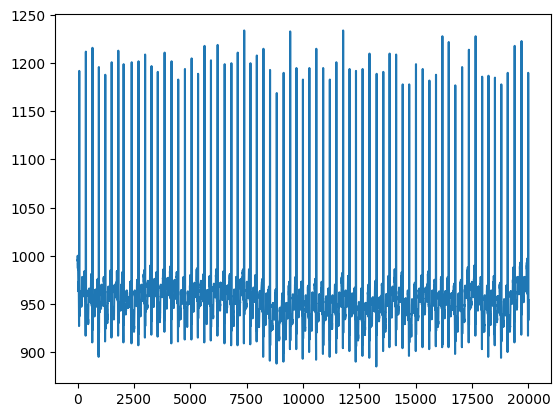

,Unnamed: 0,MLII
0,0,995
1,1,995
2,2,995
3,3,995
4,4,995


In [16]:
#загрузка сигнала из .csv файла с pandas
df = pd.read_csv(r'/content/gdrive/MyDrive/Colab Notebooks/ecg.csv')
plt.plot(df['MLII'])
plt.show()
df.head()

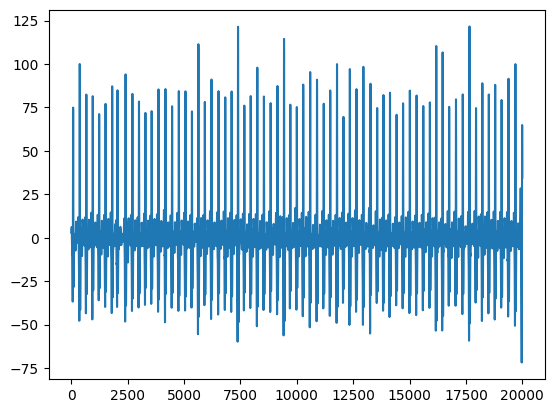

In [17]:
#фильтрация сигнала с библиотекой heartpy
filtered = hp.filter_signal(df['MLII'], cutoff = [0.75, 3.5], sample_rate = 100, order = 3, filtertype='bandpass')
plt.plot(filtered)
plt.show()

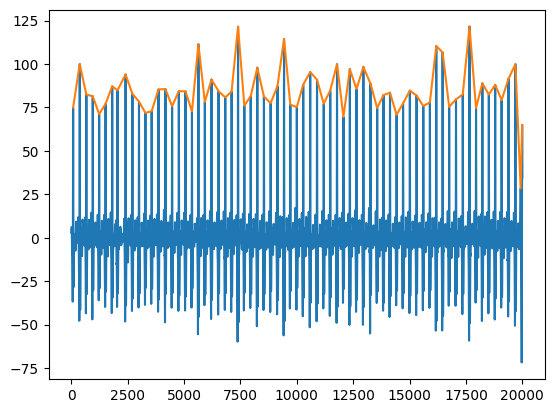

In [18]:
#поиск точек максимума с библиотекой scipy
peaks, _ = find_peaks(filtered, height=20)
plt.plot(filtered)
plt.plot(peaks, filtered[peaks])
plt.show()

Дата записи сигнала: 2023-01-05
Длина сигнала: 20000


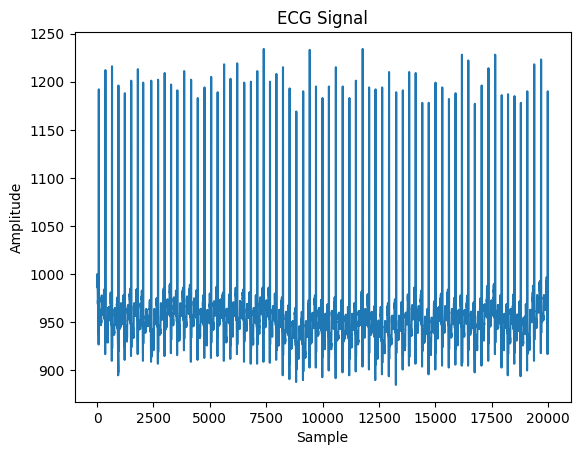

Статистика RR интервалов: {'mean': 289, 'std': 31, 'min': 66, 'max': 358}


In [25]:
class experiment:
    def __init__(self, data):
        self.data = data
        self.path_signal = data['signal']
        self.parameters = data['parameters']
        self.signal = self.load_signal()

    def load_signal(self):
        df = pd.read_csv(self.path_signal)
        return df['MLII'].values

    def get_date(self):
        return self.data['date']

    def get_signal_length(self):
        return len(self.signal)

    def plot_signal(self):
        plt.plot(self.signal)
        plt.title("ECG Signal")
        plt.xlabel("Sample")
        plt.ylabel("Amplitude")
        plt.show()

    def _signal_filtration(self, filtration_parameters=None):
        if filtration_parameters is None:
            filtration_parameters = {'cutoff': [0.75, 3.5], 'sample_rate': 100, 'order': 3, 'filtertype': 'bandpass'  }

        filtered_signal = hp.filter_signal(self.signal,
                                            cutoff=filtration_parameters['cutoff'],
                                            sample_rate=filtration_parameters['sample_rate'],
                                            order=filtration_parameters['order'],
                                            filtertype=filtration_parameters['filtertype'])
        return filtered_signal

    def _signal_find_peaks(self, signal, find_peaks_parameters=None):
        if find_peaks_parameters is None:
            find_peaks_parameters = {'height': 20}

        peaks, _ = find_peaks(signal, **find_peaks_parameters)
        return peaks

    def _calculate_RR_intervals(self):
        filtered_signal = self._signal_filtration()
        peaks = self._signal_find_peaks(filtered_signal)
        rr_intervals = np.diff(peaks)
        return rr_intervals

    def get_RR_statistics(self):
        rr_intervals = self._calculate_RR_intervals()
        return {
            'mean': round(np.mean(rr_intervals)),
            'std': round(np.std(rr_intervals)),
            'min': round(np.min(rr_intervals)),
            'max': round(np.max(rr_intervals))
        }



experiment = experiment(data = {
    'date': '2023-01-05',
    'signal': '/content/gdrive/MyDrive/Colab Notebooks/ecg.csv',
    'parameters': {}
})
print("Дата записи сигнала:", experiment.get_date())
print("Длина сигнала:", experiment.get_signal_length())
experiment.plot_signal()
print("Статистика RR интервалов:", experiment.get_RR_statistics())

##Задача ** "Минигольф"

 в папке на githab